<a href="https://colab.research.google.com/github/chaurasia-aditya/CaptchaTheBots/blob/main/Attacks_easy_medium_hard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 13s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test_predicted = np.argmax(y_test, axis=1)

In [ ]:
height, width, channels = 32, 32, 3
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']

#FGSM Attacks

In [ ]:
x_test_adv1=np.load('/content/X_CNN_adv_FGSM.npy')
x_test_adv2=np.load('/content/X_VGG_adv_FGSM.npy')
x_test_adv3=np.load('/content/X_VGG_augm_adv_FGSM.npy')
x_test_adv4=np.load('/content/X_Resnet50_adv_FGSM.npy')
x_test_adv5=np.load('/content/X_Resnet101_adv_FGSM.npy')

In [ ]:
y_test_adv1=np.load('/content/Y_CNN_adv_FGSM_predicted_labels.npy')
y_test_adv2=np.load('/content/Y_VGG_adv_FGSM_predicted_labels.npy')
y_test_adv3=np.load('/content/Y_VGG_augm_adv_FGSM_predicted_labels.npy')
y_test_adv4=np.load('/content/Y_Resnet50_adv_FGSM.npy')
y_test_adv5=np.load('/content/Y_Resnet101_adv_FGSM.npy')

## Easy Case (All models fail)

In [ ]:
all_models_failed_indices = []
for i in range(len(y_test)):
    all_models_failed = (
        y_test_adv1[i] != y_test_predicted[i] and
        y_test_adv2[i] != y_test_predicted[i] and
        y_test_adv3[i] != y_test_predicted[i] and
        y_test_adv4[i] != y_test_predicted[i] and
        y_test_adv5[i] != y_test_predicted[i]
    )

    if all_models_failed:
        all_models_failed_indices.append(i)

print(f"Number of cases where all models fail: {len(all_models_failed_indices)}")
print(f"Indices of images where all models fail: {all_models_failed_indices}")

Number of cases where all models fail: 948
Indices of images where all models fail: [12, 16, 28, 33, 42, 47, 55, 58, 66, 74, 125, 134, 147, 154, 156, 158, 164, 167, 172, 178, 183, 199, 200, 210, 224, 247, 254, 263, 266, 275, 293, 325, 327, 354, 355, 375, 378, 384, 386, 418, 421, 426, 431, 433, 434, 437, 439, 456, 458, 518, 525, 526, 548, 549, 551, 568, 577, 594, 598, 639, 640, 651, 659, 665, 677, 682, 683, 688, 703, 704, 711, 715, 720, 733, 749, 766, 776, 792, 804, 809, 810, 816, 835, 853, 866, 886, 887, 893, 905, 908, 910, 925, 956, 980, 993, 1001, 1047, 1057, 1061, 1072, 1105, 1118, 1163, 1181, 1191, 1212, 1220, 1222, 1224, 1228, 1230, 1236, 1239, 1261, 1263, 1299, 1300, 1328, 1333, 1356, 1361, 1391, 1399, 1428, 1430, 1434, 1444, 1453, 1491, 1492, 1496, 1498, 1504, 1506, 1509, 1515, 1538, 1543, 1545, 1553, 1559, 1582, 1586, 1618, 1626, 1630, 1633, 1636, 1637, 1644, 1649, 1681, 1684, 1685, 1698, 1711, 1731, 1738, 1746, 1750, 1752, 1759, 1765, 1771, 1779, 1791, 1797, 1805, 1807, 1862, 

In [ ]:
image=X_test[16]
adversarial=x_test_adv5[16]

Original Image Prediction: dog
Adversary Prediction: cat


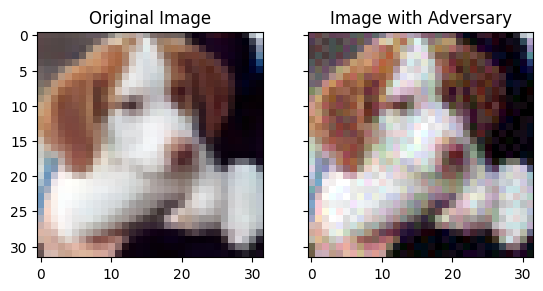

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
print(f'Original Image Prediction: {label_names[y_test_predicted[16]]}')
ax1.imshow(image.reshape(height,width, channels))
ax1.set_title("Original Image")
print(f"Adversary Prediction: {label_names[y_test_adv5[16]]}")
ax2.imshow(adversarial.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

## Hard Cases (None of the Models Fail)

In [ ]:
no_models_failed_indices = []
for i in range(len(y_test)):
    no_models_failed = (
        y_test_adv1[i] == y_test_predicted[i] and
        y_test_adv2[i] == y_test_predicted[i] and
        y_test_adv3[i] == y_test_predicted[i] and
        y_test_adv4[i] == y_test_predicted[i] and
        y_test_adv5[i] == y_test_predicted[i]
    )

    if no_models_failed:
        no_models_failed_indices.append(i)

print(f"Number of cases where no models fail: {len(no_models_failed_indices)}")
print(f"Indices of images where no models fail: {no_models_failed_indices}")

Number of cases where no models fail: 140
Indices of images where no models fail: [5, 43, 64, 107, 481, 534, 570, 590, 632, 663, 839, 901, 927, 1062, 1071, 1125, 1147, 1338, 1468, 1483, 1528, 1655, 1665, 1677, 1680, 1781, 1892, 1915, 1968, 2072, 2074, 2093, 2104, 2315, 2332, 2333, 2445, 2475, 2478, 2492, 2513, 2602, 2610, 2623, 2639, 2662, 2707, 2709, 2741, 2772, 2802, 3197, 3214, 3304, 3545, 3555, 3582, 3598, 3720, 3775, 4007, 4161, 4168, 4196, 4243, 4257, 4413, 4434, 4584, 4711, 4746, 4767, 4788, 4835, 4891, 5052, 5157, 5196, 5284, 5434, 5513, 5519, 5523, 5564, 5631, 5715, 5743, 6007, 6088, 6103, 6149, 6274, 6455, 6483, 6502, 6518, 6546, 6635, 6636, 6662, 6731, 6802, 6803, 7049, 7123, 7298, 7302, 7317, 7325, 7335, 7445, 7471, 7500, 7550, 7585, 7677, 7764, 7777, 7891, 8315, 8442, 8570, 8605, 8634, 8635, 8781, 8975, 8988, 9006, 9194, 9251, 9456, 9530, 9599, 9614, 9615, 9660, 9677, 9713, 9848]


In [ ]:
image_H=X_test[632]
adversarial_H=x_test_adv5[632]

Original Image Prediction: frog
Adversary Prediction: frog


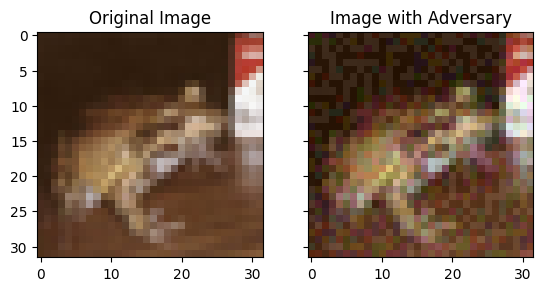

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
print(f'Original Image Prediction: {label_names[y_test_predicted[632]]}')
ax1.imshow(image_H.reshape(height,width, channels))
ax1.set_title("Original Image")
print(f"Adversary Prediction: {label_names[y_test_adv5[632]]}")
ax2.imshow(adversarial_H.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

## Medium Cases (Some Models Fail)

In [ ]:
all_indices = np.arange(10000)
some_models_failed_indices = [i for i in all_indices if (i not in all_models_failed_indices and i not in no_models_failed_indices)]

In [ ]:
image_M=X_test[751]
adversarial_M=x_test_adv5[751]

Original Image Prediction: bird
Adversary Prediction: airplane


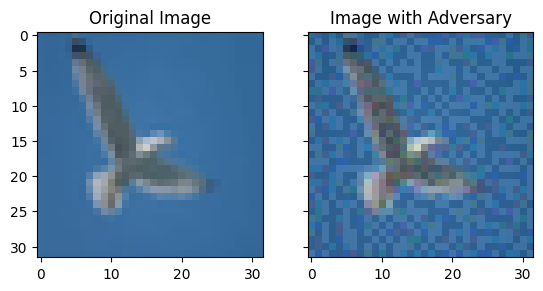

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
print(f'Original Image Prediction: {label_names[y_test_predicted[751]]}')
ax1.imshow(image_M.reshape(height,width, channels))
ax1.set_title("Original Image")
print(f"Adversary Prediction: {label_names[y_test_adv5[751]]}")
ax2.imshow(adversarial_M.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

# HopSkip Attacks

In [ ]:
x_test_adv1_hop=np.load('/content/cnn_hopskip_x_adv.npy')
x_test_adv2_hop=np.load('/content/VGG_dropout_hopskip_x_adv.npy')
x_test_adv3_hop=np.load('/content/VGG_augm_hopskip_x_adv.npy')
x_test_adv4_hop=np.load('/content/Resnet50_hopskip_X.npy')
x_test_adv5_hop=np.load('/content/X_Resnet101_adv_Hopskip.npy')

In [ ]:
y_test_adv1_hop=np.load('/content/Y_CNN_adv_Hopskip.npy')
y_test_adv2_hop=np.load('/content/Y_VGG_adv_Hopskip.npy')
y_test_adv3_hop=np.load('/content/Y_VGG_augm_adv_Hopskip.npy')
y_test_adv4_hop=np.load('/content/Resnet50_hopskip_y.npy')
y_test_adv5_hop=np.load('/content/Y_Resnet101_adv_Hopskip.npy')

## Easy Case HopSkip(All models fail)

In [ ]:
all_models_failed_indices_hopskip = []
for i in range(len(y_test)):
    all_models_failed_hopskip = (
        y_test_adv1_hop[i] != y_test_predicted[i] and
        y_test_adv2_hop[i] != y_test_predicted[i] and
        y_test_adv3_hop[i] != y_test_predicted[i] and
        y_test_adv4_hop[i] != y_test_predicted[i] and
        y_test_adv5_hop[i] != y_test_predicted[i]
    )

    if all_models_failed_hopskip:
        all_models_failed_indices_hopskip.append(i)

print(f"Number of cases where all models fail: {len(all_models_failed_indices_hopskip)}")
print(f"Indices of images where all models fail: {all_models_failed_indices_hopskip}")

Number of cases where all models fail: 6778
Indices of images where all models fail: [1, 4, 5, 6, 7, 9, 10, 14, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 49, 51, 52, 54, 55, 58, 59, 62, 64, 65, 66, 67, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 84, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 104, 105, 107, 108, 110, 111, 113, 114, 116, 118, 120, 121, 122, 123, 124, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 140, 141, 142, 144, 146, 148, 149, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 170, 172, 173, 174, 175, 178, 180, 181, 182, 183, 185, 186, 188, 190, 192, 193, 195, 196, 197, 199, 200, 201, 202, 204, 206, 207, 209, 211, 212, 214, 217, 218, 219, 221, 222, 223, 227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 244, 246, 247, 249, 250, 251, 252, 253, 254, 255, 257, 258, 260, 261, 262, 264, 267, 269, 270, 272, 274, 275, 276, 282, 283, 285, 286, 290, 291

In [ ]:
image_hop=X_test[1]
adversarial_hop=x_test_adv5_hop[1]

Original Image Prediction: ship
Adversary Prediction: cat


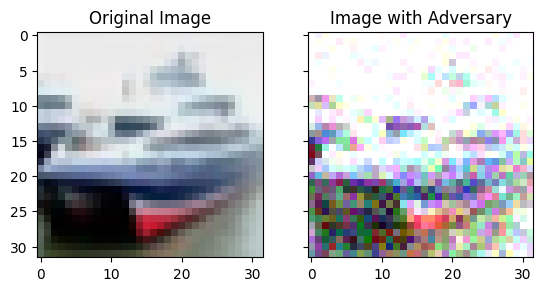

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
print(f'Original Image Prediction: {label_names[y_test_predicted[1]]}')
ax1.imshow(image_hop.reshape(height,width, channels))
ax1.set_title("Original Image")
print(f"Adversary Prediction: {label_names[y_test_adv5_hop[1]]}")
ax2.imshow(adversarial_hop.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

## Hard Cases (None of the Models Fail)

In [ ]:
no_models_failed_indices_hopskip = []
for i in range(len(y_test)):
    no_models_failed_hopskip = (
        y_test_adv1_hop[i] == y_test_predicted[i] and
        y_test_adv2_hop[i] == y_test_predicted[i] and
        y_test_adv3_hop[i] == y_test_predicted[i] and
        y_test_adv4_hop[i] == y_test_predicted[i] and
        y_test_adv5_hop[i] == y_test_predicted[i]
    )

    if no_models_failed_hopskip:
        no_models_failed_indices_hopskip.append(i)

print(f"Number of cases where no models fail: {len(no_models_failed_indices_hopskip)}")
print(f"Indices of images where no models fail: {no_models_failed_indices_hopskip}")

Number of cases where no models fail: 0
Indices of images where no models fail: []


In [ ]:
image_hop_H=X_test[85]
adversarial_hop_H=x_test_adv5_hop[85]

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
print(f'Original Image Prediction: {label_names[y_test_predicted[85]]}')
ax1.imshow(image_hop_H.reshape(height,width, channels))
ax1.set_title("Original Image")
print(f"Adversary Prediction: {label_names[y_test_adv5_hop[85]]}")
ax2.imshow(adversarial_hop_H.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

## Medium Cases (Some Models Fail)

In [ ]:
all_indices = np.arange(10000)
some_models_failed_indices_hopskip = [i for i in all_indices if (i not in all_models_failed_indices_hopskip and i not in no_models_failed_indices_hopskip)]

In [ ]:
image_hop_M=X_test[85]
adversarial_hop_M=x_test_adv5_hop[85]

Original Image Prediction: dog
Adversary Prediction: cat


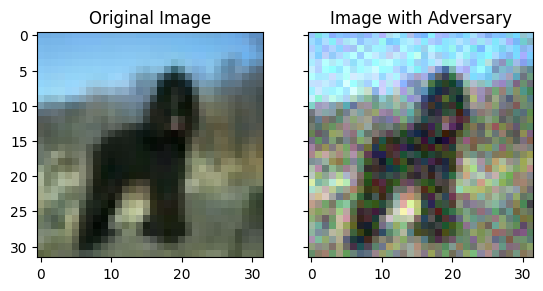

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
print(f'Original Image Prediction: {label_names[y_test_predicted[85]]}')
ax1.imshow(image_hop_M.reshape(height,width, channels))
ax1.set_title("Original Image")
print(f"Adversary Prediction: {label_names[y_test_adv5_hop[85]]}")
ax2.imshow(adversarial_hop_M.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

# PGD Attack

In [ ]:
x_test_adv1_pgd=np.load('/content/CNN_x_adv_pgd.npy')
x_test_adv2_pgd=np.load('/content/VGG_dropout_x_adv_pgd.npy')
x_test_adv3_pgd=np.load('/content/VGG_aug_x_adv_pgd.npy')
x_test_adv4_pgd=np.load('/content/X_Resnet50_adv_PGD.npy')
x_test_adv5_pgd=np.load('/content/X_Resnet101_adv_PGD.npy')

In [ ]:
y_test_adv1_pgd=np.load('/content/CNN.npy')
y_test_adv2_pgd=np.load('/content/VGG.npy')
y_test_adv3_pgd=np.load('/content/VGG_aug.npy')
y_test_adv4_pgd=np.load('/content/Resnet50.npy')
y_test_adv5_pgd=np.load('/content/Resnet101.npy')

## Easy Case

In [ ]:
all_models_failed_indices_pgd = []
for i in range(len(y_test)):
    all_models_failed_pgd = (
        y_test_adv1_pgd[i] != y_test_predicted[i] and
        y_test_adv2_pgd[i] != y_test_predicted[i] and
        y_test_adv3_pgd[i] != y_test_predicted[i] and
        y_test_adv4_pgd[i] != y_test_predicted[i] and
        y_test_adv5_pgd[i] != y_test_predicted[i]
    )

    if all_models_failed_pgd:
        all_models_failed_indices_pgd.append(i)

print(f"Number of cases where all models fail: {len(all_models_failed_indices_pgd)}")
print(f"Indices of images where all models fail: {all_models_failed_indices_pgd}")

Number of cases where all models fail: 2296
Indices of images where all models fail: [9, 22, 26, 27, 33, 35, 50, 56, 58, 59, 65, 66, 70, 84, 87, 100, 101, 109, 113, 119, 125, 128, 129, 134, 140, 145, 147, 148, 151, 154, 155, 158, 160, 165, 166, 168, 171, 172, 183, 184, 190, 194, 195, 199, 207, 209, 210, 213, 217, 223, 229, 236, 237, 239, 241, 247, 249, 251, 253, 254, 255, 270, 271, 274, 279, 289, 295, 302, 305, 307, 316, 317, 318, 321, 322, 323, 325, 327, 328, 340, 342, 349, 352, 354, 356, 357, 361, 366, 368, 373, 375, 378, 381, 383, 394, 411, 418, 419, 420, 421, 428, 433, 436, 443, 444, 445, 454, 463, 465, 466, 474, 477, 485, 488, 492, 500, 502, 503, 504, 506, 517, 520, 526, 530, 531, 537, 543, 548, 550, 556, 562, 564, 566, 567, 568, 579, 583, 587, 591, 594, 598, 621, 627, 629, 635, 640, 644, 648, 649, 657, 658, 659, 665, 667, 668, 677, 679, 680, 682, 684, 690, 702, 704, 707, 718, 728, 729, 730, 731, 736, 752, 754, 755, 766, 767, 773, 787, 790, 792, 793, 796, 797, 799, 805, 806, 816, 

In [ ]:
index = 9
image=X_test[index]
adversarial_pgd=x_test_adv5_pgd[index]

Original Image Prediction: automobile
Adversary Prediction: frog


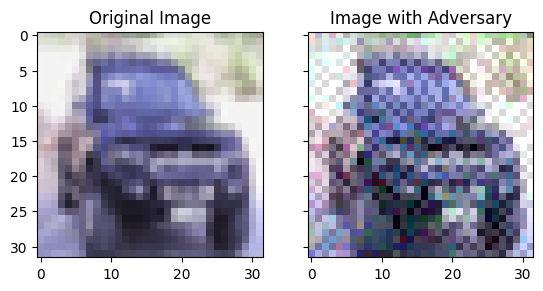

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
print(f'Original Image Prediction: {label_names[y_test_predicted[index]]}')
ax1.imshow(image.reshape(height,width, channels))
ax1.set_title("Original Image")
print(f"Adversary Prediction: {label_names[y_test_adv5_pgd[index]]}")
ax2.imshow(adversarial_pgd.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

## Hard Case

In [ ]:
no_models_failed_indices_pgd = []
for i in range(len(y_test)):
    no_models_failed_pgd = (
        y_test_adv1_pgd[i] == y_test_predicted[i] and
        y_test_adv2_pgd[i] == y_test_predicted[i] and
        y_test_adv3_pgd[i] == y_test_predicted[i] and
        y_test_adv4_pgd[i] == y_test_predicted[i] and
        y_test_adv5_pgd[i] == y_test_predicted[i]
    )

    if no_models_failed_pgd:
        no_models_failed_indices_pgd.append(i)

print(f"Number of cases where all models fail: {len(no_models_failed_indices_pgd)}")
print(f"Indices of images where all models fail: {no_models_failed_indices_pgd}")

Number of cases where all models fail: 490
Indices of images where all models fail: [19, 29, 93, 102, 105, 123, 133, 146, 202, 235, 272, 291, 297, 300, 311, 333, 334, 341, 374, 392, 395, 429, 472, 481, 498, 512, 516, 536, 542, 576, 578, 590, 605, 609, 610, 612, 616, 650, 772, 801, 827, 871, 902, 915, 934, 946, 949, 992, 999, 1010, 1029, 1037, 1071, 1081, 1135, 1143, 1170, 1194, 1232, 1234, 1243, 1259, 1298, 1301, 1311, 1317, 1327, 1338, 1347, 1351, 1412, 1421, 1445, 1447, 1460, 1468, 1473, 1483, 1490, 1517, 1540, 1562, 1591, 1629, 1665, 1677, 1691, 1729, 1743, 1781, 1819, 1833, 1839, 1843, 1865, 1866, 1880, 1882, 1901, 1968, 1974, 1992, 2040, 2050, 2052, 2074, 2084, 2089, 2093, 2104, 2115, 2138, 2139, 2149, 2182, 2220, 2257, 2265, 2295, 2326, 2341, 2345, 2373, 2389, 2402, 2410, 2428, 2445, 2450, 2457, 2462, 2478, 2484, 2485, 2492, 2513, 2537, 2541, 2561, 2564, 2601, 2602, 2607, 2620, 2621, 2639, 2683, 2687, 2693, 2694, 2715, 2741, 2748, 2764, 2772, 2799, 2802, 2813, 2819, 2820, 2837, 2

In [ ]:
index = 19
image=X_test[index]
adversarial_pgd=x_test_adv1_pgd[index]

Original Image Prediction: frog
Adversary Prediction: frog


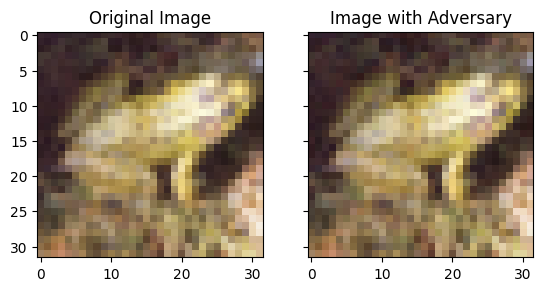

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
print(f'Original Image Prediction: {label_names[y_test_predicted[index]]}')
ax1.imshow(image.reshape(height,width, channels))
ax1.set_title("Original Image")
print(f"Adversary Prediction: {label_names[y_test_adv1_pgd[index]]}")
ax2.imshow(adversarial_pgd.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

## Medium Case

In [ ]:
all_indices = np.arange(10000)

In [ ]:
some_models_failed_indices_pgd = [i for i in all_indices if (i not in all_models_failed_indices_pgd and i not in no_models_failed_indices_pgd)]

In [ ]:
index = 5
image=X_test[index]
adversarial_pgd=x_test_adv5_pgd[index]

Original Image Prediction: frog
Adversary Prediction: frog


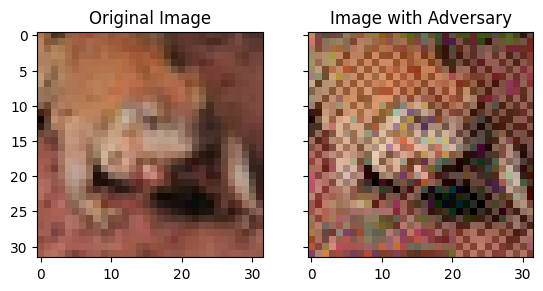

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
print(f'Original Image Prediction: {label_names[y_test_predicted[index]]}')
ax1.imshow(image.reshape(height,width, channels))
ax1.set_title("Original Image")
print(f"Adversary Prediction: {label_names[y_test_adv5_pgd[index]]}")
ax2.imshow(adversarial_pgd.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()